In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dython.nominal import associations

In [8]:
df_test = pd.read_csv('./dataset/test.csv')
df_test

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
0,137142,CADILUXE,MID-SIZE,3.6,NaN,AS8,X,6.40 km/L,1.77 L/100 km,25.04 MPG (AS)
1,137143,FOLD,VAN - PASSENGER,3.7,6.0,AS6,X,21.11 L/100km,14.38 liters per 100 km,5.53 km per L
2,137144,MITSU,SUV - SMALL,6.0,NaN,AV6,X,9.60 MPG (AS),27.45 mpg Imp.,12.99 MPG (AS)
3,137145,LECUS,MID-SIZE,4.6,NaN,AS8,Z,1.68 L/10km,6.29 km/L,16.42 L/100km
4,137146,BMV,SUV - STANDARD,4.4,8.0,AS8,Z,5.65 MPG (AS),14.75 mpg Imp.,31.52 L/100km
...,...,...,...,...,...,...,...,...,...,...
58771,195913,KIO,SUV - SMALL,3.3,NaN,A6,X,15.39 mpg Imp.,2.09 L/10km,1.95 L/10km
58772,195914,FOLD,unspecified,1.6,4.0,AS6,X,38.00 MPG (AS),35.64 MPG (AS),15.69 km/L
58773,195915,CHEVO,SUV - STANDARD,3.5,unestablished,A6,X,6.90 km/L,21.38 MPG (AS),18.20 MPG (AS)
58774,195916,FOLD,unknown,5.0,8.0,AS6,X,27.93 MPG (AS),51.20 MPG (AS),42.16 mpg Imp.


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58776 entries, 0 to 58775
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Id                     58776 non-null  int64 
 1   Make                   58776 non-null  object
 2   Vehicle Class          58243 non-null  object
 3   Engine Size(L)         51537 non-null  object
 4   Cylinders              52822 non-null  object
 5   Transmission           57621 non-null  object
 6   Fuel Type              58006 non-null  object
 7   Fuel Consumption City  57729 non-null  object
 8   Fuel Consumption Hwy   57781 non-null  object
 9   Fuel Consumption Comb  57641 non-null  object
dtypes: int64(1), object(9)
memory usage: 4.5+ MB


In [10]:
df_test.isna().sum()

Id                          0
Make                        0
Vehicle Class             533
Engine Size(L)           7239
Cylinders                5954
Transmission             1155
Fuel Type                 770
Fuel Consumption City    1047
Fuel Consumption Hwy      995
Fuel Consumption Comb    1135
dtype: int64

In [11]:
numerical = [
    "Engine Size(L)",
    "Cylinders",
]

categorical = ["Make", "Vehicle Class", "Transmission", "Fuel Type"]

should_be_numerical = [
    "Fuel Consumption City",
    "Fuel Consumption Hwy",
    "Fuel Consumption Comb",
]

In [12]:
# Define conversion functions
def km_per_l_to_l_per_100km(val):
    return 100 / val if val != 0 else 0


def mpg_imp_to_l_per_100km(val):
    return 282.481 / val if val != 0 else 0


def mpg_as_to_l_per_100km(val):
    return 235.214583 / val if val != 0 else 0


def l_per_10km_to_l_per_100km(val):
    return val * 10


# Define a function to standardize units
def standardize_units(row):
    for col in [
        "Fuel Consumption City",
        "Fuel Consumption Hwy",
        "Fuel Consumption Comb",
    ]:
        val = row[col]

        # if pd.isnull(val) or val in ["-", "", "not-available", "zero"]:
        if pd.isnull(val) or val in [
            "-1",
            "0",
            "9999",
            "-9999",
            "not-available",
            "zero",
        ]:
            row[col] = np.nan
        elif "km per L" in val or " km/L" in val:
            row[col] = km_per_l_to_l_per_100km(
                float(val.replace(" km per L", "").replace(" km/L", ""))
            )
        elif "mpg Imp." in val:
            row[col] = mpg_imp_to_l_per_100km(float(val.replace(" mpg Imp.", "")))
        elif "MPG (AS)" in val:
            row[col] = mpg_as_to_l_per_100km(float(val.replace(" MPG (AS)", "")))
        # elif "L/10km" in val or " L/ km" in val:
        elif "L/10km" in val:
            row[col] = l_per_10km_to_l_per_100km(
                # float(val.replace(" L/10km", "").replace(" L/ km", ""))
                float(val.replace(" L/10km", ""))
            )
        elif "liters per 100 km" in val or " L/100 km" in val or " L/100km" in val:
            row[col] = float(
                val.replace(" liters per 100 km", "")
                .replace(" L/100 km", "")
                .replace(" L/100km", "")
            )
    return row

In [13]:
# Apply the function to each row in the DataFrame
df_should_be_numerical_fixed = df_test[should_be_numerical].apply(standardize_units, axis=1)
df_should_be_numerical_fixed

,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
0,15.625000,1.770000,9.393554
1,21.110000,14.380000,18.083183
2,24.501519,10.290747,18.107358
3,16.800000,15.898251,16.420000
4,41.630900,19.151254,31.520000
...,...,...,...
58771,18.354841,20.900000,19.500000
58772,6.189857,6.599736,6.373486
58773,14.492754,11.001618,12.923878
58774,8.421575,4.594035,6.700213


In [20]:
values_to_replace = [
    "not-recorded",
    "missing",
    "na",
    "not-available",
    "unspecified",
    "unestablished",
    "unknown",
    "-1",
]

df_test = df_test.replace(values_to_replace, np.nan)

In [21]:
for col in numerical:
    df_test[col] = pd.to_numeric(df_test[col], errors="ignore")
df_test[categorical] = df_test[categorical].astype("category")
df_test = df_test.drop(df_should_be_numerical_fixed.columns.tolist(), axis=1)
df_test = pd.concat([df_test, df_should_be_numerical_fixed], axis=1)
df_test

,Id,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb
0,137142,CADILUXE,MID-SIZE,3.6,NaN,AS8,X,15.625000,1.770000,9.393554
1,137143,FOLD,VAN - PASSENGER,3.7,6.0,AS6,X,21.110000,14.380000,18.083183
2,137144,MITSU,SUV - SMALL,6.0,NaN,AV6,X,24.501519,10.290747,18.107358
3,137145,LECUS,MID-SIZE,4.6,NaN,AS8,Z,16.800000,15.898251,16.420000
4,137146,BMV,SUV - STANDARD,4.4,8.0,AS8,Z,41.630900,19.151254,31.520000
...,...,...,...,...,...,...,...,...,...,...
58771,195913,KIO,SUV - SMALL,3.3,NaN,A6,X,18.354841,20.900000,19.500000
58772,195914,FOLD,NaN,1.6,4.0,AS6,X,6.189857,6.599736,6.373486
58773,195915,CHEVO,SUV - STANDARD,3.5,NaN,A6,X,14.492754,11.001618,12.923878
58774,195916,FOLD,NaN,5.0,8.0,AS6,X,8.421575,4.594035,6.700213


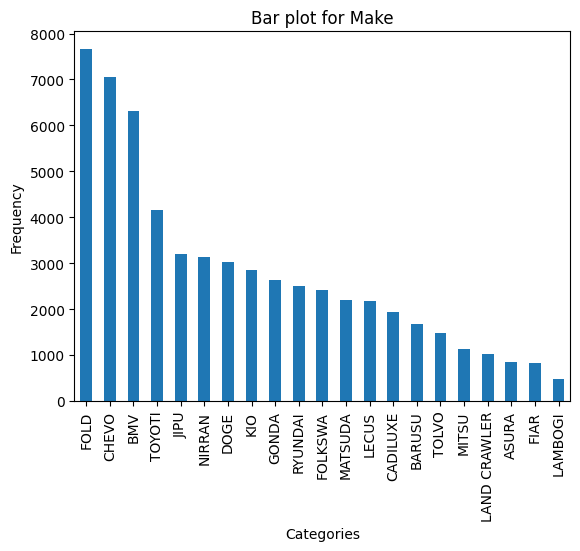

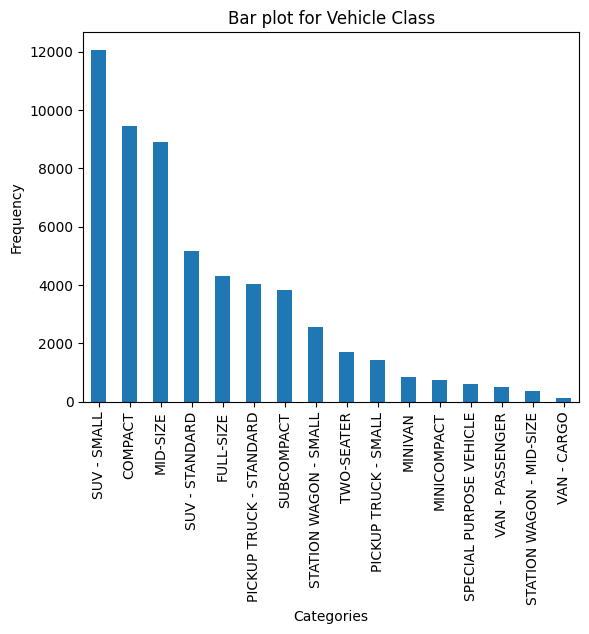

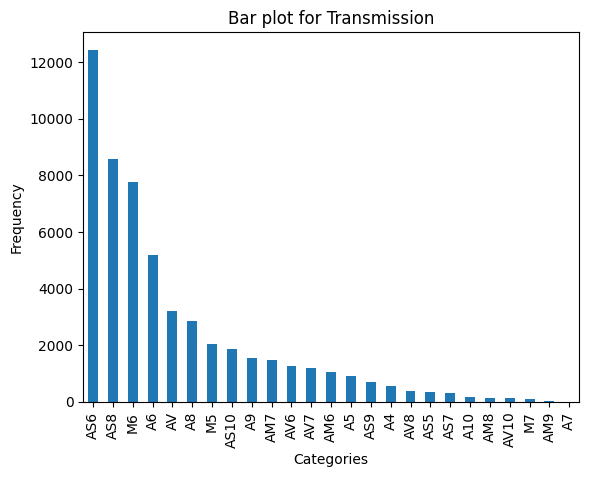

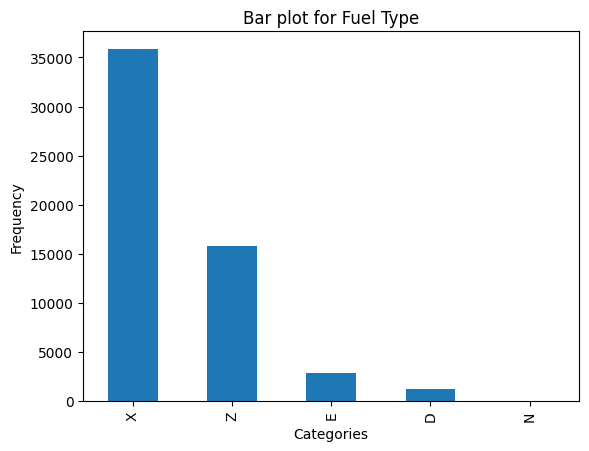

In [23]:
# Assuming categorical_columns is a list of your categorical column names
for col in categorical:
    value_counts = df_test[col].value_counts()

    # Create a bar plot
    value_counts.plot(kind="bar")

    # Add title and labels
    plt.title(f"Bar plot for {col}")
    plt.xlabel("Categories")
    plt.ylabel("Frequency")

    # Show the plot
    plt.show()

c:\Users\sesar\Documents\_PROJECTS\bebass\venv31011\lib\site-packages\dython\nominal.py:708: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[i], columns[j]] = _inf_nan_str(ij)
c:\Users\sesar\Documents\_PROJECTS\bebass\venv31011\lib\site-packages\dython\nominal.py:709: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  inf_nan.loc[columns[j], columns[i]] = _inf_nan_str(ji)


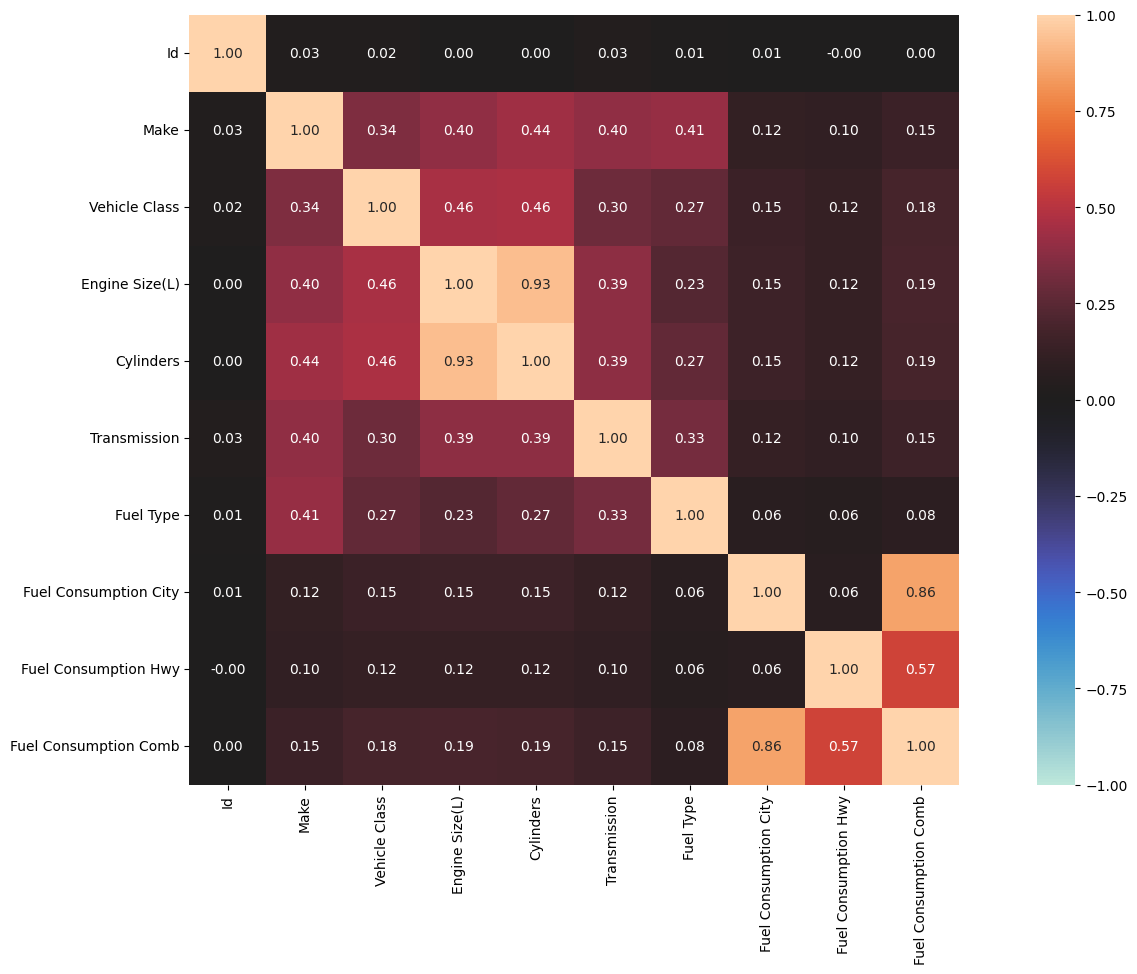

In [26]:
associations(df_test, figsize=(20, 10), nan_strategy="drop_samples")
print()

In [28]:
df_test.to_csv("./dataset/test_preprocessed.csv", index=False)